In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [110]:

data = {
    "area": [2600, 3000, 3200,3600,4000],
    "price": [550000,565000,610000,680000,725000]
}
df = pd.DataFrame(data) 
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


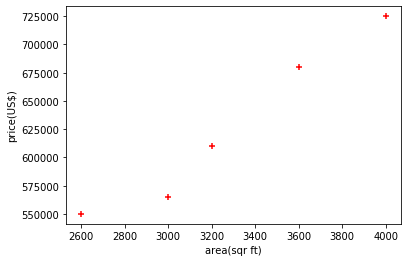

In [111]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price, color='red', marker='+')

In [112]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
reg.predict(np.array([3300, 5000]).reshape(2,1))

array([628715.75342466, 859554.79452055])

In [114]:
reg.coef_

array([135.78767123])

In [115]:
reg.intercept_

180616.43835616432

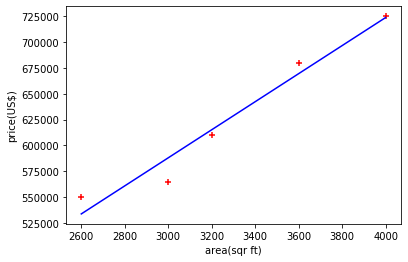

In [116]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [117]:
df2 = pd.DataFrame({'area': [1000, 1500,2300]})
df2

,area
0,1000
1,1500
2,2300


In [118]:
p = reg.predict(df2)

In [119]:
df2['price'] = p
df2

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


In [120]:
multi= pd.read_csv("HomePrices.csv")
multi

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [121]:
multi.bedrooms = multi.bedrooms.fillna(3)
multi

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [122]:
multi_reg = linear_model.LinearRegression()
multi_reg.fit(multi[['area', 'bedrooms', 'age']], multi.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
multi_reg.coef_

array([  119.67905405, 13097.24903475, -4207.28764479])

In [124]:
multi_reg.intercept_

256461.14864864887

In [125]:
multi_reg.predict([[3000,3,15]])

array([591680.74324324])

In [126]:
import pickle

In [127]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)

In [128]:
with open('model_pickle', 'rb') as f:
    mp= pickle.load(f)

In [129]:
mp.predict([[5000]])

array([859554.79452055])

In [130]:
import joblib

In [131]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [132]:
mj = joblib.load('model_joblib')

In [133]:
mj.predict([[5000]])

array([859554.79452055])

In [134]:
ohe = pd.read_csv('HomePrices2.csv')

In [135]:
dummies = pd.get_dummies(ohe.town)
merged = pd.concat([ohe, dummies], axis="columns")
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [136]:
final = merged.drop(['town', 'west windsor'], axis="columns")
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [137]:
ohe_model = linear_model.LinearRegression()

In [138]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [139]:
Y = final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [140]:
ohe_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
ohe_model.predict([[2800, 0, 1]])

array([590775.63964739])

In [142]:
ohe_model.predict([[3400, 0, 0]])

array([681241.66845839])

In [143]:
ohe_model.score(X,Y)

0.9573929037221873

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [145]:
ohe_le=ohe
ohe_le.town = le.fit_transform(ohe_le.town)
ohe_le

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [146]:
X_le = ohe_le[['town', 'area']].values
X_le

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [147]:
Y_le = ohe_le.price.values
Y_le

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [149]:
from sklearn.preprocessing import OneHotEncoder
ohencoder = OneHotEncoder(categories=[0])

In [152]:
X_le_t = ohencoder.fit_transform(X_le).toarray()
X_le_t

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [154]:
cardf = pd.read_csv('carprices.csv')
cardf.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


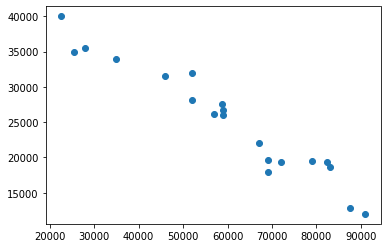

In [156]:
plt.scatter(cardf['Mileage'], cardf['Sell Price($)'])

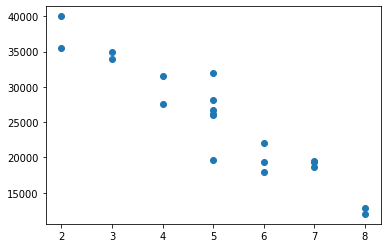

In [157]:
plt.scatter(cardf['Age(yrs)'], cardf['Sell Price($)'])

In [158]:
carX = cardf[['Mileage', 'Age(yrs)']]
carX

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [160]:
carY = cardf['Sell Price($)']
carY

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [161]:
from sklearn.model_selection import train_test_split

In [184]:
X_train_car, X_test_car, Y_train_car, Y_test_car = train_test_split(carX, carY, test_size=0.2)

In [185]:
len(X_train_car)

16

In [186]:
car_model = linear_model.LinearRegression()

In [187]:
car_model.fit(X_train_car, Y_train_car)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
car_model.predict(X_test_car)

array([38298.00397405, 22315.48361379, 28241.25244664, 15994.01788091])

In [189]:
Y_test_car

3     40000
0     18000
19    28200
18    12800
Name: Sell Price($), dtype: int64

In [190]:
car_model.score(X_test_car, Y_test_car)

0.9267064637821727